In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('./deep_data/housing.csv', header=None, delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
y = df.values[:,13]
x = df.values[:,:13]

In [9]:
y # continuous data => regression

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=100)

In [12]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) # regression의 output layer에서는 activation은 없다

# binary cis activation : sigmoid
# multiclassification : softmax

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
hist = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=20)

Epoch 1/200
16/16 [==============================] - 0s 10ms/step - loss: 20.5489 - val_loss: 27.0031
Epoch 2/200
16/16 [==============================] - 0s 8ms/step - loss: 19.0561 - val_loss: 24.8488
Epoch 3/200
16/16 [==============================] - 0s 8ms/step - loss: 18.6043 - val_loss: 25.2413
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 18.8586 - val_loss: 24.5857
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 17.6367 - val_loss: 26.4969
Epoch 6/200
16/16 [==============================] - 0s 6ms/step - loss: 20.3233 - val_loss: 24.5499
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 24.0950 - val_loss: 38.9428
Epoch 8/200
16/16 [==============================] - 0s 6ms/step - loss: 22.0175 - val_loss: 24.6313
Epoch 9/200
16/16 [==============================] - 0s 6ms/step - loss: 18.7793 - val_loss: 26.4691
Epoch 10/200
16/16 [==============================] - 0s 6ms/step - loss: 18.5991 - val_lo

Epoch 161/200
16/16 [==============================] - 0s 5ms/step - loss: 11.7753 - val_loss: 39.6722
Epoch 162/200
16/16 [==============================] - 0s 5ms/step - loss: 14.8069 - val_loss: 22.5227
Epoch 163/200
16/16 [==============================] - 0s 6ms/step - loss: 11.9965 - val_loss: 23.2976
Epoch 164/200
16/16 [==============================] - 0s 5ms/step - loss: 11.3104 - val_loss: 22.2489
Epoch 165/200
16/16 [==============================] - 0s 4ms/step - loss: 11.2409 - val_loss: 23.0749
Epoch 166/200
16/16 [==============================] - 0s 5ms/step - loss: 11.4046 - val_loss: 23.0716
Epoch 167/200
16/16 [==============================] - 0s 5ms/step - loss: 11.4625 - val_loss: 31.1891
Epoch 168/200
16/16 [==============================] - 0s 6ms/step - loss: 13.3109 - val_loss: 24.1274
Epoch 169/200
16/16 [==============================] - 0s 5ms/step - loss: 11.6738 - val_loss: 27.4571
Epoch 170/200
16/16 [==============================] - 0s 5ms/step - loss

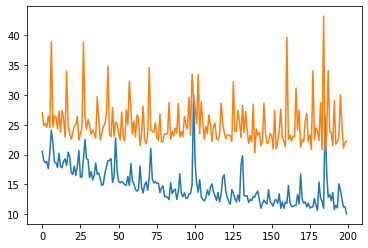

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [22]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 25.1527


25.152658462524414

In [ ]:
# scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(x_train)
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [25]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

hist = model.fit(x_train_sc, y_train, validation_split=0.2, epochs=200, batch_size=20)



Epoch 1/200
16/16 [==============================] - 0s 12ms/step - loss: 592.7516 - val_loss: 594.1212
Epoch 2/200
16/16 [==============================] - 0s 9ms/step - loss: 583.7142 - val_loss: 584.3898
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 571.4835 - val_loss: 568.0757
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 549.3933 - val_loss: 538.6760
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 510.1770 - val_loss: 487.5174
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 445.0493 - val_loss: 407.4992
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 349.8045 - val_loss: 300.9081
Epoch 8/200
16/16 [==============================] - 0s 6ms/step - loss: 233.7550 - val_loss: 199.2538
Epoch 9/200
16/16 [==============================] - 0s 6ms/step - loss: 147.4180 - val_loss: 147.4432
Epoch 10/200
16/16 [==============================] - 0s 5ms/step - loss

Epoch 161/200
16/16 [==============================] - 0s 5ms/step - loss: 13.1738 - val_loss: 25.4154
Epoch 162/200
16/16 [==============================] - 0s 5ms/step - loss: 13.1074 - val_loss: 25.4597
Epoch 163/200
16/16 [==============================] - 0s 5ms/step - loss: 13.4918 - val_loss: 25.8442
Epoch 164/200
16/16 [==============================] - 0s 5ms/step - loss: 13.3609 - val_loss: 25.5843
Epoch 165/200
16/16 [==============================] - 0s 6ms/step - loss: 13.5335 - val_loss: 25.6821
Epoch 166/200
16/16 [==============================] - 0s 5ms/step - loss: 13.0313 - val_loss: 25.5649
Epoch 167/200
16/16 [==============================] - 0s 5ms/step - loss: 13.3266 - val_loss: 25.7673
Epoch 168/200
16/16 [==============================] - 0s 4ms/step - loss: 13.1996 - val_loss: 25.4585
Epoch 169/200
16/16 [==============================] - 0s 4ms/step - loss: 12.9572 - val_loss: 25.4529
Epoch 170/200
16/16 [==============================] - 0s 4ms/step - loss

In [26]:
model.evaluate(x_test_sc, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 21.2120


21.212032318115234

In [ ]:
# prediction

In [27]:
pred = model.predict(x_test_sc)

In [ ]:
# evaluation

In [28]:
from sklearn.metrics import r2_score
r2_score(pred, y_test)

0.6875650173858363

In [31]:
for i in range(10):
    preds = pred[i]
    real_pred = y_test[i]
    print('{} - {}'.format(round(real_pred), round(preds[0])))

35 - 34
32 - 35
21 - 22
14 - 18
16 - 19
22 - 23
23 - 26
24 - 23
20 - 22
17 - 19
